In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()

In [5]:
import statsmodels as sm

In [6]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [8]:
from sklearn.linear_model import LinearRegression, Ridge ,Lasso

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [11]:
from sklearn. metrics import r2_score, mean_squared_error

In [12]:
from sklearn import preprocessing

In [13]:
import warnings

In [14]:
warnings.filterwarnings('ignore')

## Data Preprocessing And Exploratory Analysis 

In [15]:
cars =pd.read_csv('CAR1.csv')

In [16]:
cars.drop(cars.columns[9:], axis=1, inplace = True)

In [17]:
cars.head()

,MPG,CYLINDERS,DISPLACEMENT,horsepower,WEIGHT,ACCELERATION,MODEL,ORIGIN,CAR
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 322
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   MODEL         398 non-null    int64  
 7   ORIGIN        398 non-null    int64  
 8   CAR           398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [19]:
cars.horsepower.unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [20]:
cars.horsepower = cars.horsepower.str.replace('?', 'nan').astype(float)

In [21]:
cars.horsepower.fillna(cars.horsepower.mean() ,inplace= True)
cars.horsepower = cars.horsepower.astype(int)

In [22]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   MODEL         398 non-null    int64  
 7   ORIGIN        398 non-null    int64  
 8   CAR           398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


In [23]:
cars= cars.drop('CAR', axis =1)

In [24]:
print('sum of duplicated values:{}\n'.format(cars.duplicated().sum()))
print('sum of null values:{}'.format(cars.isnull().sum()))

sum of duplicated values:0

sum of null values:MPG             0
CYLINDERS       0
DISPLACEMENT    0
horsepower      0
WEIGHT          0
ACCELERATION    0
MODEL           0
ORIGIN          0
dtype: int64


In [25]:
display(cars.describe())

,MPG,CYLINDERS,DISPLACEMENT,horsepower,WEIGHT,ACCELERATION,MODEL,ORIGIN
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


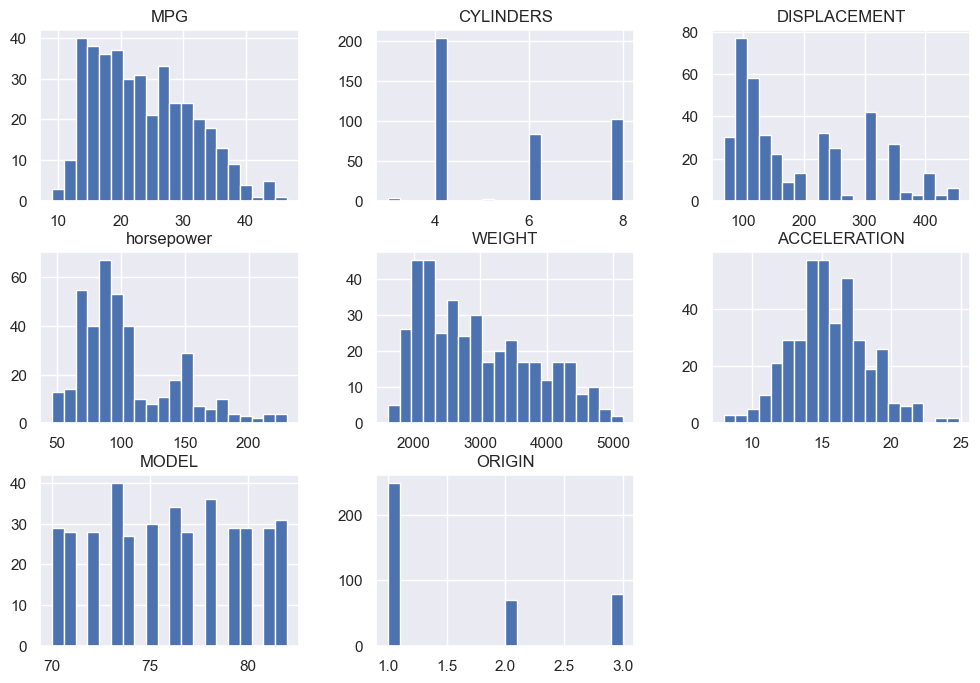

In [26]:
cars.hist(figsize=(12,8) , bins=20)
plt.show()


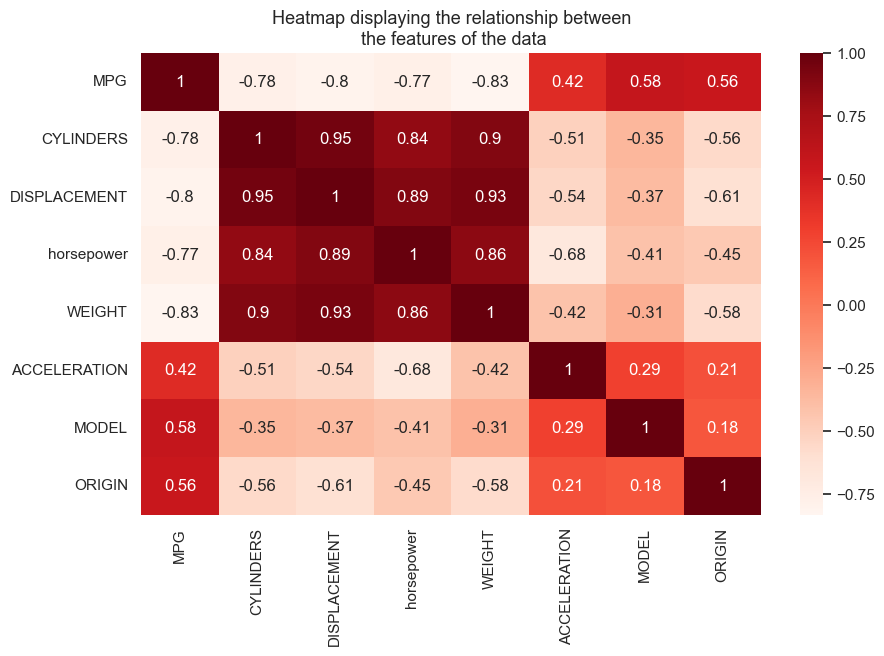

In [27]:
plt.figure(figsize=(10,6)) 
sns.heatmap(cars.corr(),cmap=plt.cm.Reds, annot=True)
plt.title('Heatmap displaying the relationship between\n the features of the data' , fontsize=13)
plt.show()

In [28]:
X1=sm.tools.add_constant(cars)

In [29]:
series1 = pd.Series([variance_inflation_factor(X1.values, i )for i in range(X1.shape[1]) ] , index=X1.columns)
series1

const           780.811358
MPG               5.583594
CYLINDERS        10.742336
DISPLACEMENT     22.159830
horsepower        9.056781
WEIGHT           13.468785
ACCELERATION      2.515908
MODEL             1.954947
ORIGIN            1.853326
dtype: float64

In [30]:
newcars= cars.drop(['CYLINDERS', 'DISPLACEMENT', 'WEIGHT'], axis=1)

In [31]:
X2= sm.tools.add_constant(newcars)
series2= pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])], index=X2.columns)
series2

const           715.683761
MPG               3.982206
horsepower        4.131289
ACCELERATION      2.029527
MODEL             1.607080
ORIGIN            1.542532
dtype: float64

## Training the Regression Model

In [32]:
X = newcars.drop('MPG', axis=1)
Y= newcars.MPG

In [33]:
X_scaled= preprocessing.scale(X)
X_scaled =pd.DataFrame(X_scaled , columns =X.columns)

In [34]:
X_train,X_test,Y_train, Y_test= train_test_split(X_scaled, Y, test_size=.3, random_state=0)
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [35]:
linear_predict= model.predict(X_test)
print('Train Score:{}\n'. format(model.score(X_train, Y_train)))
print('Test score:{}\n'.format(model.score(X_test, Y_test)))
print('overall model accuracy:{}\n'. format(r2_score(Y_test,linear_predict)))
print('Mean squared error:{}\n'.format(mean_squared_error(Y_test, linear_predict)))


Train Score:0.7553135661809438

Test score:0.7271939488775567

overall model accuracy:0.7271939488775567

Mean squared error:17.432820262005087



In [36]:
X_train,X_test,Y_train, Y_test= train_test_split(X_scaled, Y, test_size=.3, random_state=0)
model = RandomForestRegressor()
model.fit(X_train, Y_train)


RandomForestRegressor()

In [37]:
linear_predict= model.predict(X_test)
print('Train Score:{}\n'. format(model.score(X_train, Y_train)))
print('Test score:{}\n'.format(model.score(X_test, Y_test)))
print('overall model accuracy:{}\n'. format(r2_score(Y_test,linear_predict)))
print('Mean squared error:{}\n'.format(mean_squared_error(Y_test, linear_predict)))



Train Score:0.9730412818079728

Test score:0.8220464043666074

overall model accuracy:0.8220464043666074

Mean squared error:11.371569783333348



In [38]:
X_train,X_test,Y_train, Y_test= train_test_split(X_scaled, Y, test_size=.3, random_state=0)
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)


DecisionTreeRegressor()

In [39]:
linear_predict= model.predict(X_test)
print('Train Score:{}\n'. format(model.score(X_train, Y_train)))
print('Test score:{}\n'.format(model.score(X_test, Y_test)))
print('overall model accuracy:{}\n'. format(r2_score(Y_test,linear_predict)))
print('Mean squared error:{}\n'.format(mean_squared_error(Y_test, linear_predict)))



Train Score:0.9998490680089627

Test score:0.7209941356383485

overall model accuracy:0.7209941356383485

Mean squared error:17.829000000000004



In [40]:
newcars_new = newcars.drop('MPG', axis=1)

In [46]:
gradient_model = GradientBoostingRegressor() 
param = {'alpha':[0,0.1,0.01,0.001,1]}
param['learning_rate']= [0.05,0.1,0.2,0.3,0.4,0.5]
gradient_search= RandomizedSearchCV(gradient_model,param, cv=5,n_jobs=-1, n_iter=50) 
gradient_search.fit(X_train,Y_train)                           



RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.01, 0.001, 1],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5]})

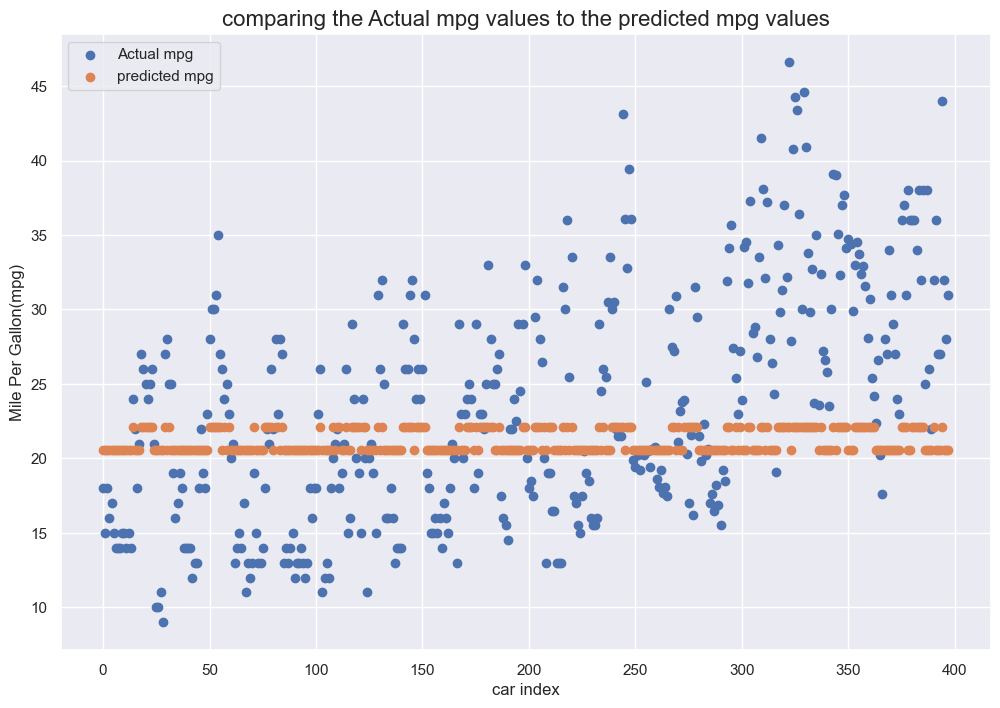

In [64]:
newcars_new= newcars.drop('MPG', axis=1)
data=pd.DataFrame({'Actual mpg': newcars.MPG.values, 'predicted mpg': gradient_search.predict(newcars_new.values)})
plt.figure(figsize=(12,8))
plt.scatter(data.index, data['Actual mpg'].values, label = 'Actual mpg')
plt.scatter(data.index ,data['predicted mpg'].values, label = 'predicted mpg')
plt.title('comparing the Actual mpg values to the predicted mpg values',fontsize =16)
plt.xlabel('car index')
plt.ylabel('Mile Per Gallon(mpg)')
plt.legend(loc='upper left')
plt.show()